In [2]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
# read telecom churn data from csv
df = pd.read_csv('./datasets/telecom_churn_clean.csv')

# print the shape of the dataframe
print("Details of the Data")

print(df.info())

Details of the Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              3333 non-null   int64  
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   international_plan      3333 non-null   int64  
 4   voice_mail_plan         3333 non-null   int64  
 5   number_vmail_messages   3333 non-null   int64  
 6   total_day_minutes       3333 non-null   float64
 7   total_day_calls         3333 non-null   int64  
 8   total_day_charge        3333 non-null   float64
 9   total_eve_minutes       3333 non-null   float64
 10  total_eve_calls         3333 non-null   int64  
 11  total_eve_charge        3333 non-null   float64
 12  total_night_minutes     3333 non-null   float64
 13  total_night_calls       3333 non-null   int64  
 14  total_night_charge  

In [67]:
# features as numpy array
X = df[['account_length', 'customer_service_calls']].values

# target values
y = df['churn'].values

0       415
1       415
2       415
3       408
4       415
       ... 
3328    415
3329    415
3330    510
3331    510
3332    415
Name: area_code, Length: 3333, dtype: int64

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) 

In [78]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [70]:
y_pred = knn.predict(X_test)

In [76]:
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f'Model Accuracy = {accuracy * 100} %')

Model Accuracy = 85.00749625187406 %


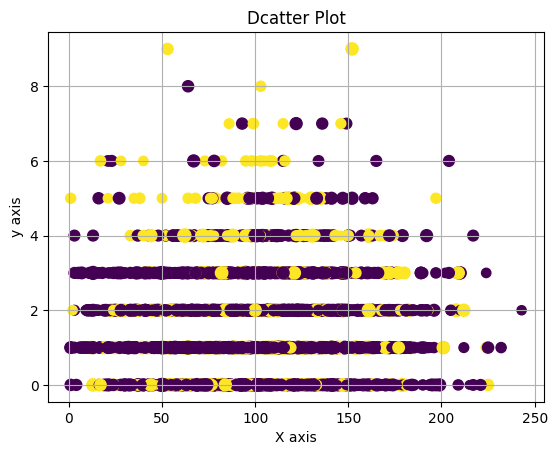

In [18]:
import matplotlib.pyplot as plt

df['total_charge'] = df['total_day_charge'] + df['total_night_charge'] + df['total_eve_charge'] + df['total_intl_charge']
df['total_charge'].values
df['area_code']

x1 = df['account_length'].values
x2 = df['customer_service_calls'].values
y = df['churn'].values

plt.scatter('account_length', 'customer_service_calls', c='churn', s='total_charge', data=df)

plt.xlabel('X axis')
plt.ylabel('y axis')
plt.title('Dcatter Plot')
plt.grid(True)

plt.show()

In [19]:
plt.clf()

<Figure size 640x480 with 0 Axes>

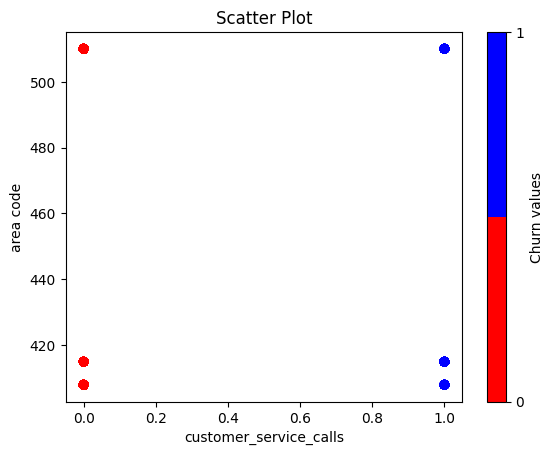

In [66]:
import matplotlib.colors as mcolors
colors = ['red','blue']
cmap_custom = mcolors.ListedColormap(colors)
scatter = plt.scatter( df['churn'], df['area_code'], c=df['churn'], cmap=cmap_custom)
plt.xlabel('customer_service_calls')
plt.ylabel('area code')
plt.title('Scatter Plot')
plt.colorbar(scatter, ticks=range(len(colors)), label='Churn values')
plt.show()